['Data', 'Metadata - Countries', 'Metadata - Indicators']


In [4]:
import pandas as pd
file_path = "API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls"
df = pd.read_excel(file_path, sheet_name='Data', skiprows=3)
print(df.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2015         2016         2017         2018  \
0      58190.0  .

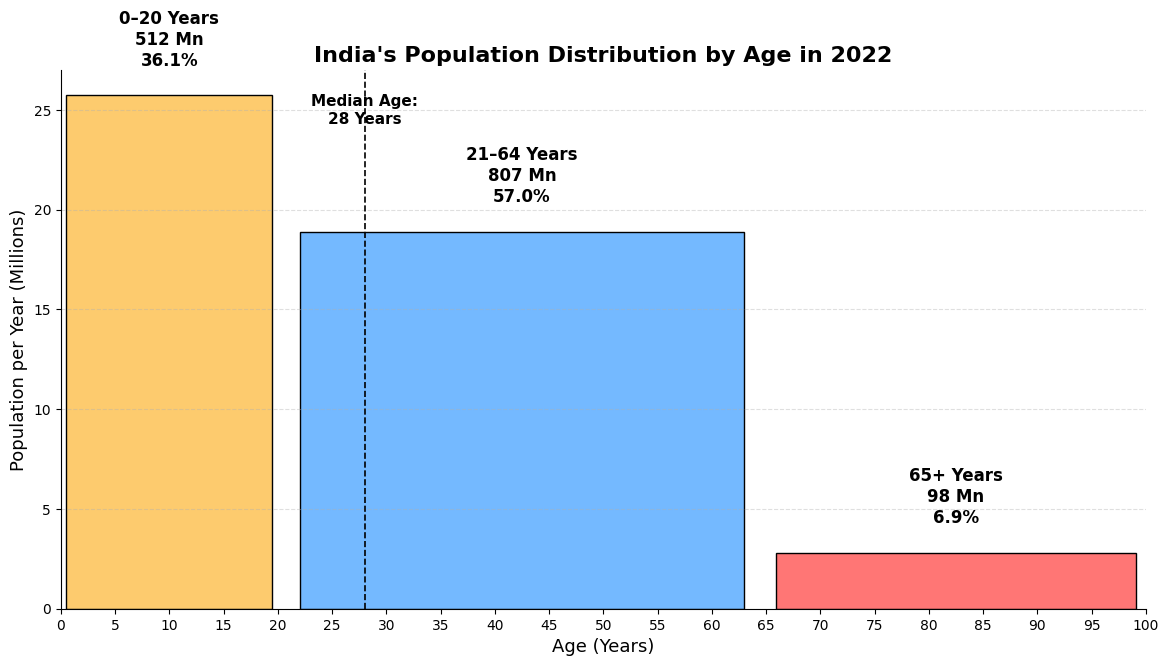

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls"
df = pd.read_excel(file_path, sheet_name='Data', skiprows=3)

india = df[(df['Country Name'] == 'India') & (df['Indicator Name'] == 'Population, total')]
population_2022 = india['2022'].values[0]

age_ranges = [(0, 20), (21, 64), (65, 100)]
percentages = [36.1, 57.0, 6.9]
labels = ['0–20 Years\n512 Mn\n36.1%', '21–64 Years\n807 Mn\n57.0%', '65+ Years\n98 Mn\n6.9%']
colors = ['#FDCB6E', '#74B9FF', '#FF7675']

fig, ax = plt.subplots(figsize=(14, 7))

for (start, end), percent, label, color in zip(age_ranges, percentages, labels, colors):
    width = end - start
    height = (population_2022 * percent / 100) / width / 1_000_000
    center = start + width / 2
    ax.bar(center, height, width=width * 0.95, color=color, edgecolor='black')
    ax.text(center, height + 1.5, label, ha='center', fontsize=12, fontweight='bold')

ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 5))
ax.set_xlabel("Age (Years)", fontsize=13)
ax.set_ylabel("Population per Year (Millions)", fontsize=13)
ax.set_title("India's Population Distribution by Age in 2022", fontsize=16, fontweight='bold')

ax.axvline(x=28, color='black', linestyle='--', linewidth=1.2)
ax.text(28, ax.get_ylim()[1]*0.9, 'Median Age:\n28 Years', ha='center', fontsize=11, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.savefig("india_population_by_age_2022.png", dpi=300, bbox_inches='tight')
plt.show()
